In [1]:
from sklearn.datasets import fetch_openml
mnist = fetch_openml('mnist_784', version=1)
mnist.keys()

dict_keys(['data', 'target', 'feature_names', 'DESCR', 'details', 'categories', 'url'])

In [2]:
import numpy as np
import pandas as pd
import matplotlib as mpl
import matplotlib.pyplot as plt

In [3]:
X, y = mnist['data'], mnist['target']
print('data shape:', X.shape, '; target shape:', y.shape)

data shape: (70000, 784) ; target shape: (70000,)


784 features, since we have a matrix of 28x28 pixels per image

In [4]:
some_digit = X[0]
some_digit_image = some_digit.reshape(28,28)

In [5]:
some_digit.shape

(784,)

<function matplotlib.pyplot.show(*args, **kw)>

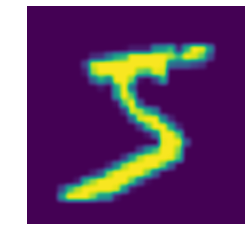

In [6]:
#plt.imshow displays data as an image. 2D array
plt.imshow(some_digit_image, interpolation = 'kaiser')
plt.axis('off')
plt.show

In [7]:
y[0] #label for the image above

'5'

The label (as expected) matches to be a 5, just as the image above suggests

In [8]:
y = y.astype(np.uint8) #Unsigned integer (0 to 255)
y[0] #Now instead of a string ('5'), it prints an integer (5)

5

In [9]:
X_train, X_test, y_train, y_test = X[:60000], X[60000:], y[:60000], y[60000:]

In [10]:
print(X_train.shape)
print(X_test.shape)
#Similarly for y

(60000, 784)
(10000, 784)


In [11]:
y_train_5 = (y_train == 5) 
y_test_5 = (y_test == 5)

# SGD

In [12]:
from sklearn.linear_model import SGDClassifier

In [13]:
sgd_clf = SGDClassifier(random_state = 42) # Same shuffle everytime
sgd_clf.fit(X_train,y_train_5)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)


SGDClassifier(alpha=0.0001, average=False, class_weight=None,
       early_stopping=False, epsilon=0.1, eta0=0.0, fit_intercept=True,
       l1_ratio=0.15, learning_rate='optimal', loss='hinge', max_iter=None,
       n_iter=None, n_iter_no_change=5, n_jobs=None, penalty='l2',
       power_t=0.5, random_state=42, shuffle=True, tol=None,
       validation_fraction=0.1, verbose=0, warm_start=False)

In [14]:
sgd_clf.predict([some_digit])

array([False])

Incorrect prediction for this particular case since 'some_digit' was indeed 5

# Cross validation

In [15]:
from sklearn.model_selection import cross_val_score # Evaluate a score using cross validation

In [16]:
cross_val_score(sgd_clf, X_train, y_train_5, cv = 3, scoring = 'accuracy') 
#cv provides the amount of 'scores' that will be returned

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

array([0.9532 , 0.95125, 0.9625 ])

Those are 3 cross validation folds, being 95% the lowest scoring one.

This is not necessarily a good estimator, and here it is why:

If you create a dumb classifier to classify every number as not a 5, since there is a even distribution of numbers (0-9), you would get it right 90% of the times, although your classifier makes no sense.

# Confusion Matrix

In [17]:
from sklearn.model_selection import cross_val_predict

In [18]:
y_train_pred = cross_val_predict(sgd_clf, X_train, y_train_5, cv = 3)

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

cross_val_predict performs a K-fold cross-validation, but it does not return the evaluation scores, instead, it returns the predictions made on each test fold.

In [19]:
from sklearn.metrics import confusion_matrix

In [20]:
confusion_matrix(y_train_5, y_train_pred)

array([[52992,  1587],
       [ 1074,  4347]])

# Precision/Recall Tradeoff

In [21]:
from sklearn.metrics import precision_score, recall_score

In [22]:
precision_score(y_train_5, y_train_pred)

0.7325581395348837

It is correct 73% of times when it claims a number is 5

In [23]:
recall_score(y_train_5, y_train_pred).round(4)

0.8019

It detects 80% of the actual 5s

In [24]:
from sklearn.metrics import f1_score

In [25]:
f1_score(y_train_5, y_train_pred) #f1 score is the harmonic mean between precision and recall

0.765653896961691

In [26]:
y_scores = sgd_clf.decision_function([some_digit])
#decision_function() method returns a score for each instance
#and then make predictions based on those scores using any threshold you want

In [27]:
y_scores

array([-45148.19955869])

In [31]:
threshold = 0
y_some_digit_pred = (y_scores>threshold)
y_some_digit_pred

array([False])

In [39]:
y_scores = cross_val_predict(sgd_clf, X_train, y_train, cv = 3, method = 'decision_function')
y_scores.shape

/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=None. If tol is not None, max_iter defaults to max_iter=1000. From 0.21, default max_iter will be 1000, and default tol will be 1e-3.
  FutureWarning)
/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/stochastic_gradient.py:166: FutureWarning: max_iter and tol parameters have been added in SGDClassifier in 0.19. If both are left unset, they default to max_iter=5 and tol=No

(60000, 10)

In [34]:
from sklearn.metrics import precision_recall_curve

In [42]:
#precisions, recalls, thresholds = precision_recall_curve(y_train_5, y_scores)

# ROC Curve